In [ ]:
import os

In [2]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge

In [3]:
from utils import read_features, read_targets, metrics_r, load_best_params, evaluate, \
    plot_prediction_scores, add_all_feature_combos, print_info_features, initialize_model, predict_with_std, \
    get_result_subsets, print_top_1, plot_true_vs_pred, fit_multimodel, predict_multimodel

## Read Features and Targets

In [4]:
path = os.path.abspath(os.path.join(os.getcwd(), "../../../data/chronology_prediction"))

In [5]:
X = read_features(path)
y = read_targets(path, ["StartYear", "YearRange"])

Loaded X_train_tfidf
Loaded X_train_bert
Loaded X_train_cannyhog
Loaded X_train_resnet
Loaded X_train_vit
Loaded X_test_tfidf
Loaded X_test_bert
Loaded X_test_cannyhog
Loaded X_test_resnet
Loaded X_test_vit
Loaded y_train
Loaded y_test


### Create and Add All Text + Image Feature Combos

In [6]:
X = add_all_feature_combos(X, scale=False)

In [7]:
print_info_features(X)

{
	train: {
		tfidf: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 300), 
		bert: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 768), 
		cannyhog: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 2917), 
		resnet: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 2048), 
		vit: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 768), 
		tfidf + cannyhog: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 3217), 
		tfidf + resnet: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 2348), 
		tfidf + vit: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 1068), 
		bert + cannyhog: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 3685), 
		bert + resnet: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 2816), 
		bert + vit: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (1719, 1536), 
	},
	test: {
		tfidf: 
			<class 'pandas.core.frame.DataFrame'>
			shape = (191, 300), 
		bert

## Load Best Parameters from HP Tuning

In [8]:
path_params = "best_params.json"
best_params = load_best_params(path_params)

## Fit Best Model-Feature Pairs & Predict Test Set

### Predict *StartDate* with *Text Data*

Best Model and Text Feature Set Pair Based on Cross Validation:
- Regression Model: **RandomForest**
- Text Feature Set: **TF-IDF**

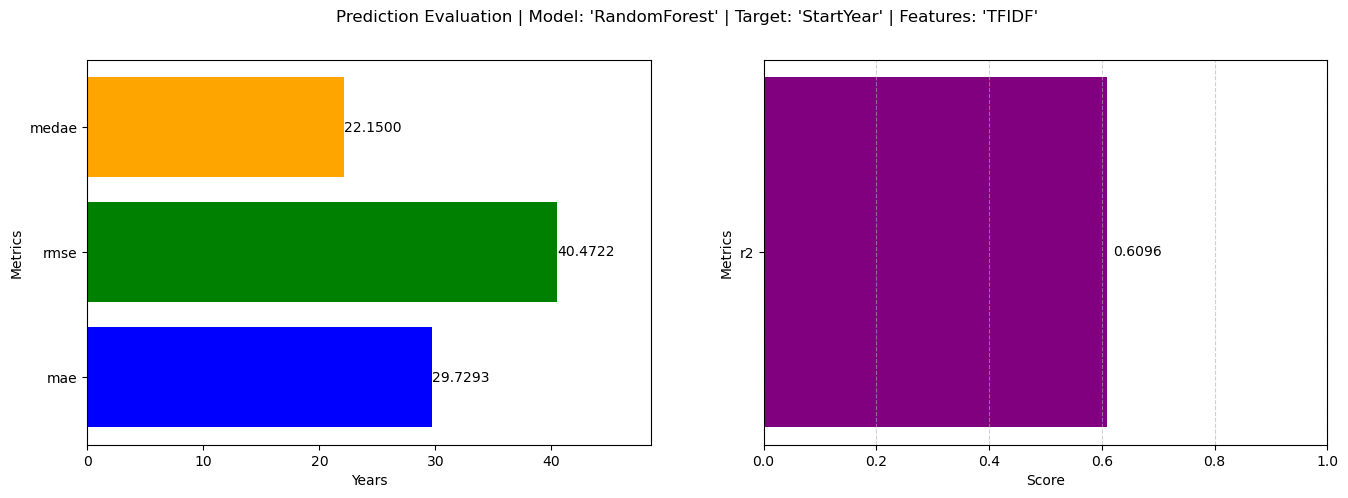



Example Sample Predictions:


,SAMPLE,y_true,y_pred,y_std,CI_lower,CI_upper,confidence_±10,error
152,RANDOM,-400.0,-405.550,58.774548,-520.745997,-290.354003,0.135101,5.550
112,BEST,-482.0,-481.860,3.668842,-489.050798,-474.669202,0.993583,0.140
159,WORST,-350.0,-485.325,65.598833,-613.896350,-356.753650,0.121161,135.325


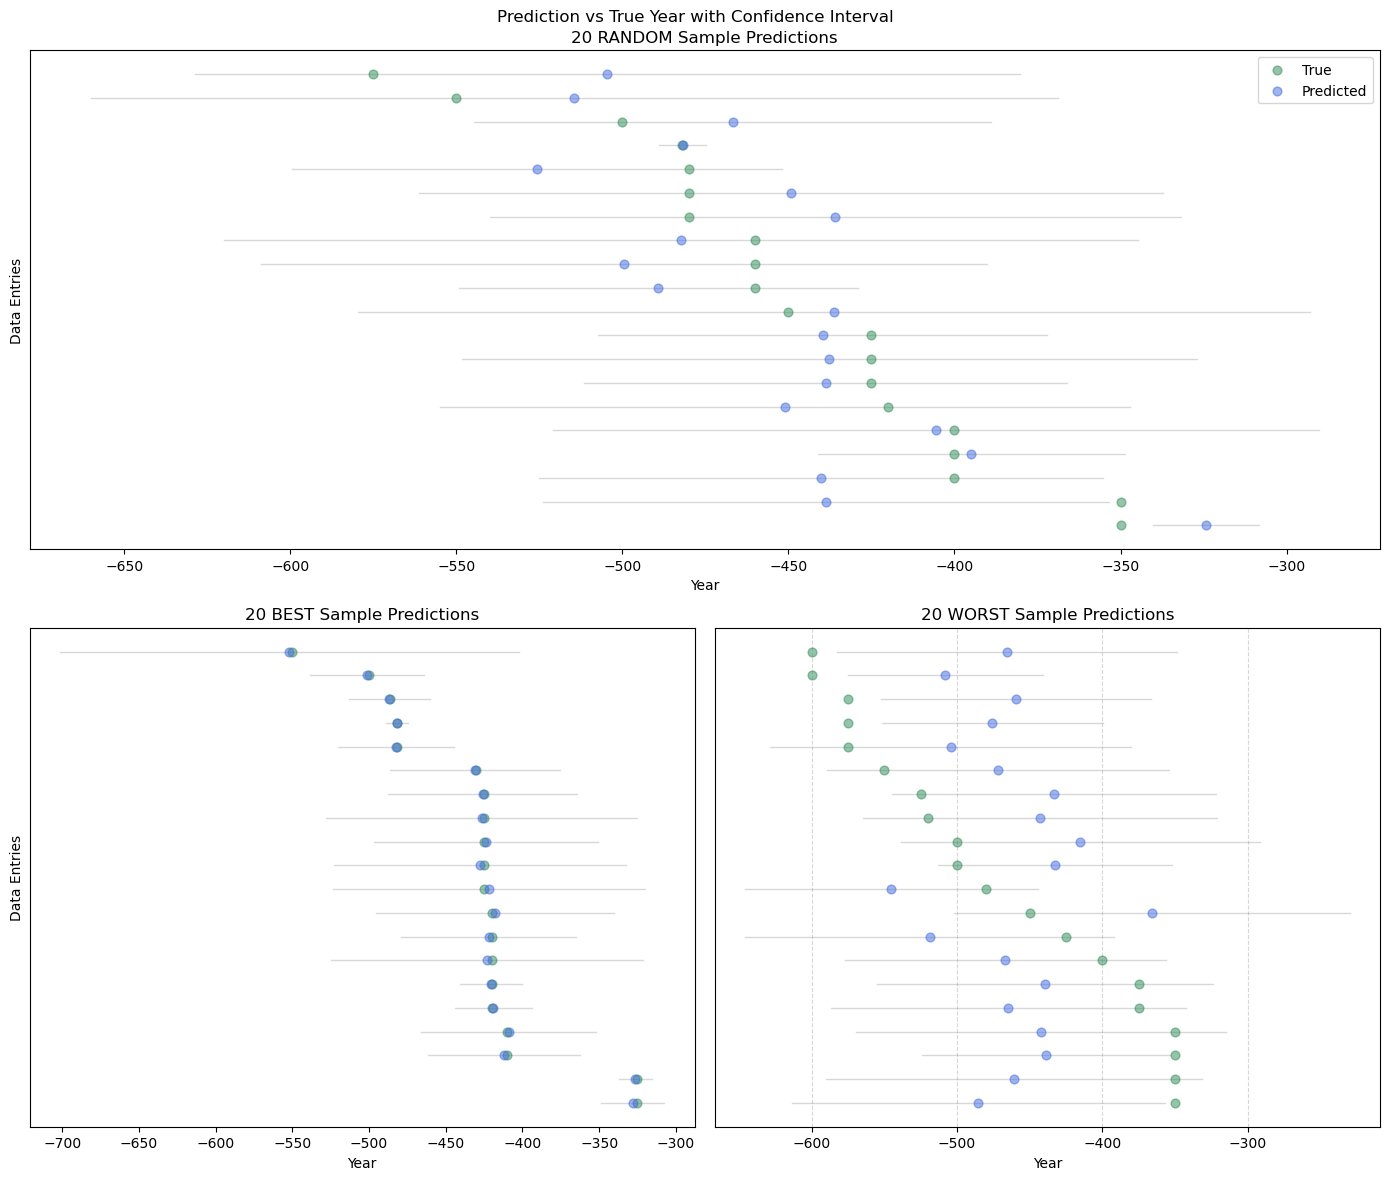

In [9]:
model_class = RandomForestRegressor
model_name = "RandomForest"
features = "tfidf"
target = "StartYear"

# Initialize Model
model = initialize_model(model_class, best_params[model_name][(features, target)])

# Fit
model.fit(X["train"][features].to_numpy(), y["train"][target].to_numpy())

# Predict
results = predict_with_std(model, X["test"][features].to_numpy(), y["test"][target].to_numpy())

# Evaluate
scores = evaluate(results["y_true"], results["y_pred"], metrics_r)
plot_prediction_scores(scores, model_name, target, features)

# Predictions Close Look
result_subsets = get_result_subsets(results, samples=20)
print_top_1(result_subsets)
plot_true_vs_pred(result_subsets)

### Predict *StartDate* with *Image Data*

Best Model and Image Feature Set Pair Based on Cross Validation:
- Regression Model: **LightGBM**
- Text Feature Set: **VIT**

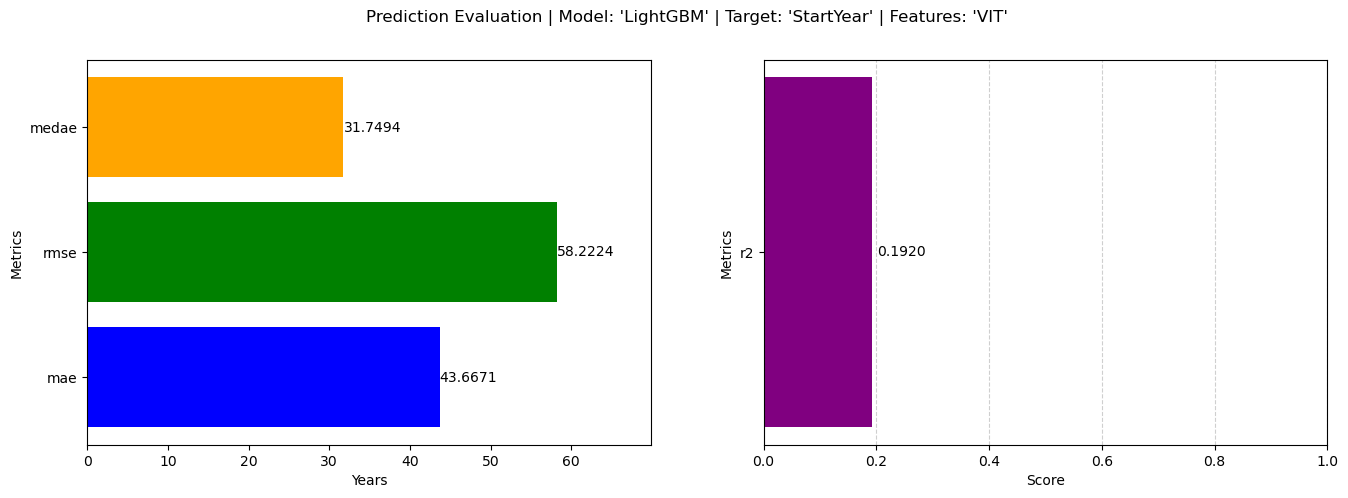



Example Sample Predictions:


,SAMPLE,y_true,y_pred,CI_lower,CI_upper,error
152,RANDOM,-400.0,-400.234529,-528.165038,-323.1775,0.234529
7,BEST,-430.0,-430.000531,-575.001629,-325.0000,0.000531
148,WORST,-320.0,-464.785780,-558.221872,-325.0000,144.785780


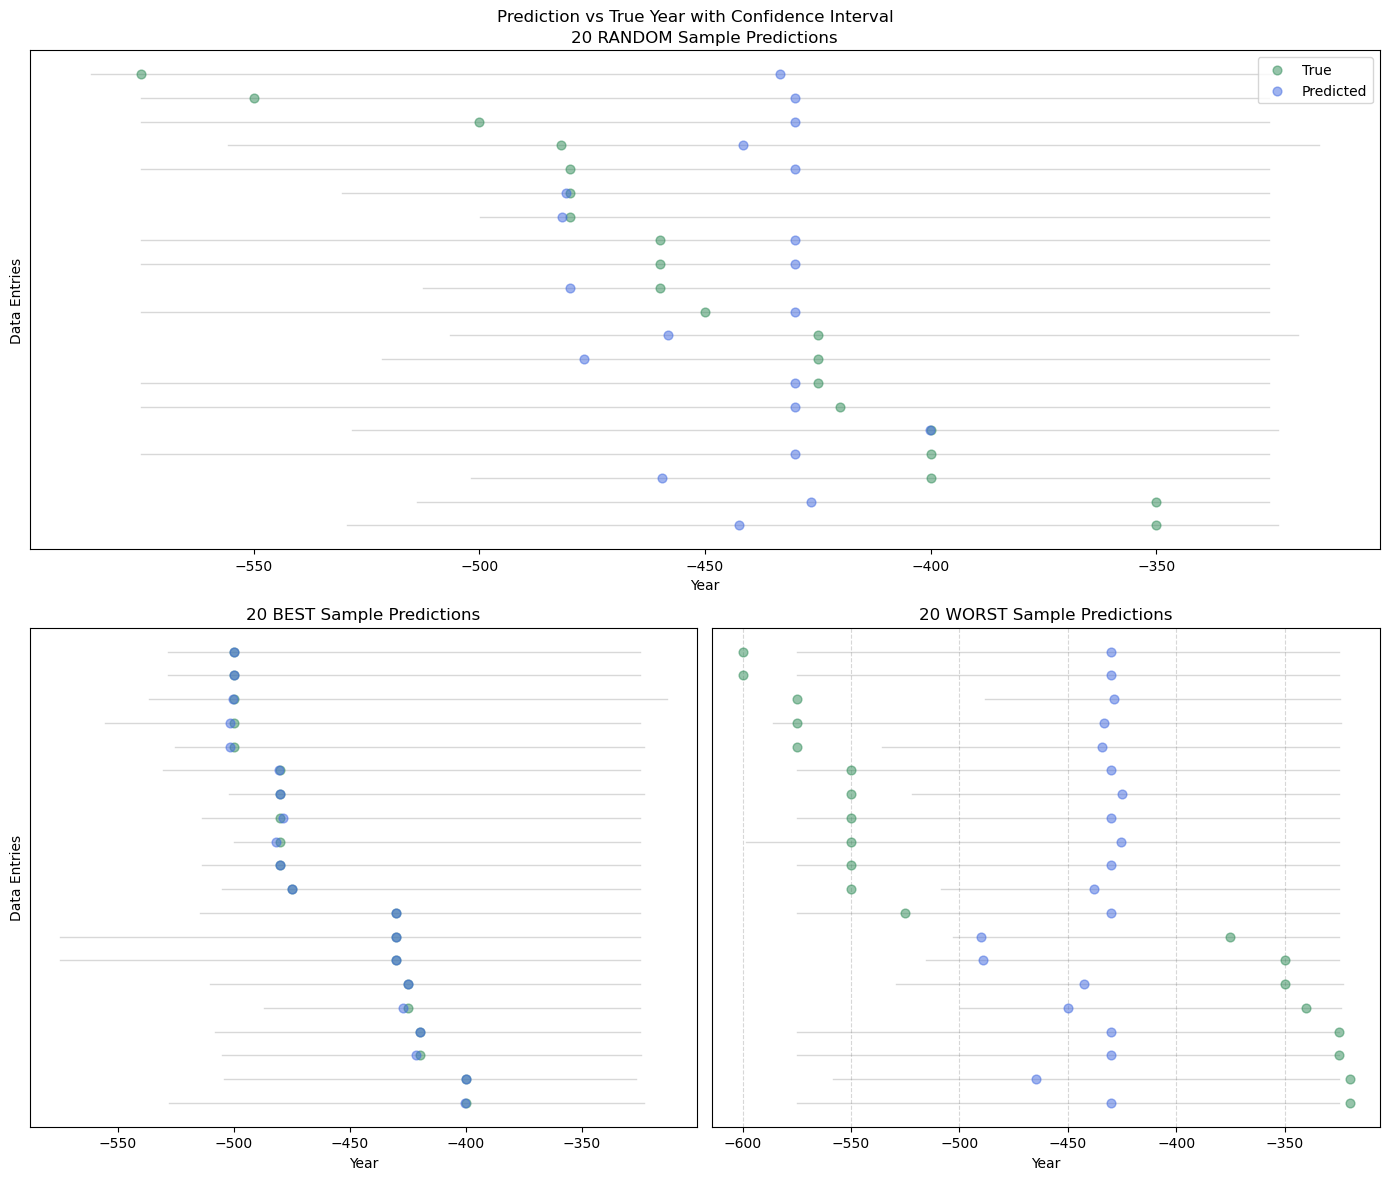

In [10]:
model_class = LGBMRegressor
model_name = "LightGBM"
features = "vit"
target = "StartYear"

# Initialize Model
models = initialize_model(model_class, best_params[model_name][(features, target)])

# Fit
models = fit_multimodel(models, X["train"][features], y["train"][target])

# Predict
results = predict_multimodel(models, X["test"][features], y["test"][target])

# Evaluate
scores = evaluate(results["y_true"], results["y_pred"], metrics_r)
plot_prediction_scores(scores, model_name, target, features)

# Predictions Close Look
result_subsets = get_result_subsets(results, samples=20)
print_top_1(result_subsets)
plot_true_vs_pred(result_subsets)

### Predict *StartYear* with *Text & Image Combination Data*

Best Model and Combo Feature Set Pair Based on Cross Validation:
- Classification Model: **LightGBM**
- Combo Feature Set: **TF-IDF + VIT**

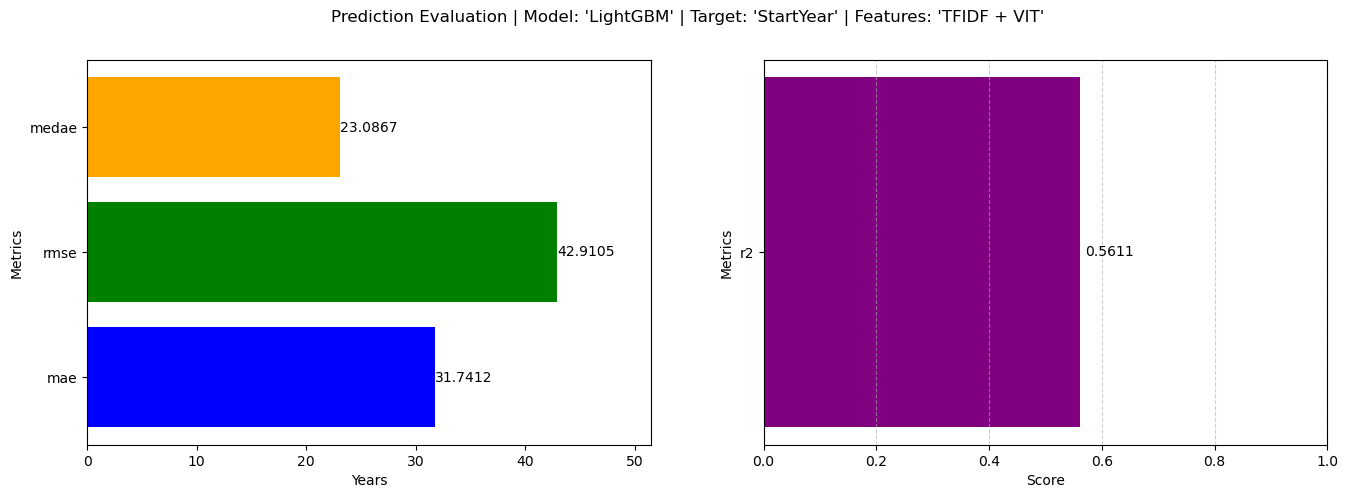



Example Sample Predictions:


,SAMPLE,y_true,y_pred,CI_lower,CI_upper,error
152,RANDOM,-400.0,-428.550967,-528.084544,-334.252950,28.550967
98,BEST,-482.0,-482.000117,-505.590291,-362.958677,0.000117
56,WORST,-315.0,-397.957853,-504.458583,-330.642544,82.957853


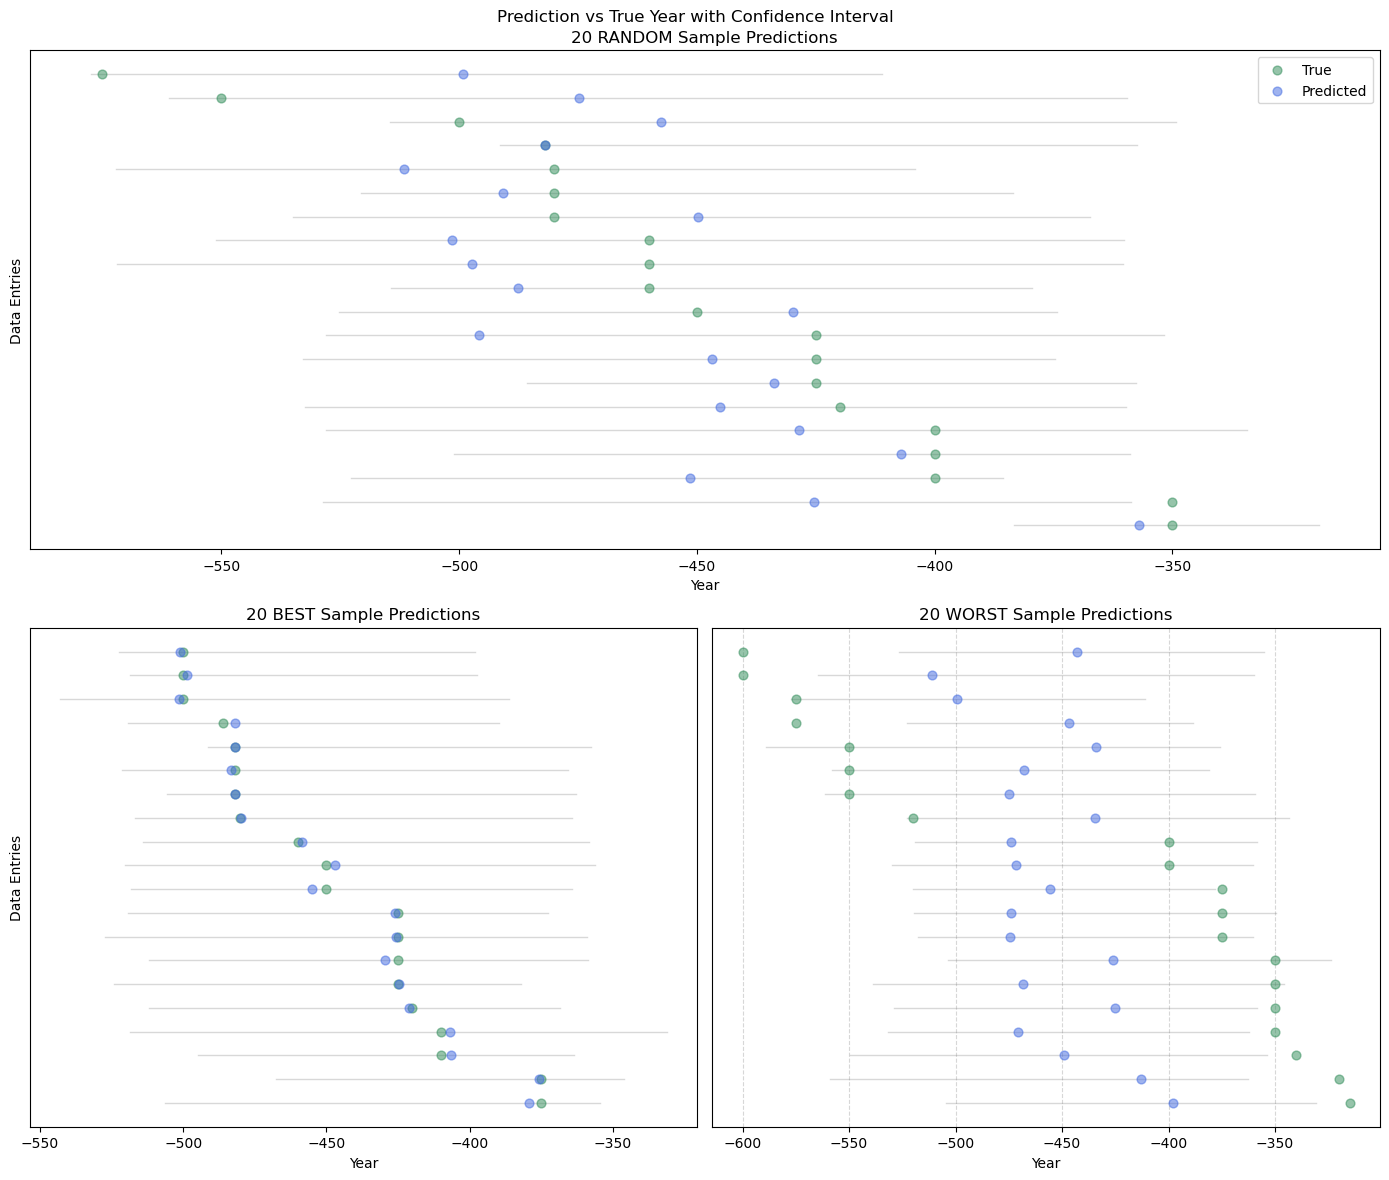

In [11]:
model_class = LGBMRegressor
model_name = "LightGBM"
features = "tfidf + vit"
target = "StartYear"

# Initialize Model
models = initialize_model(model_class, best_params[model_name][(features, target)])

# Fit
models = fit_multimodel(models, X["train"][features], y["train"][target])

# Predict
results = predict_multimodel(models, X["test"][features], y["test"][target])

# Evaluate
scores = evaluate(results["y_true"], results["y_pred"], metrics_r)
plot_prediction_scores(scores, model_name, target, features)

# Predictions Close Look
result_subsets = get_result_subsets(results, samples=20)
print_top_1(result_subsets)
plot_true_vs_pred(result_subsets)

### Predict *YearRange* with *Text Data*

Best Model and Text Feature Set Pair Based on Cross Validation:
- Regression Model: **RandomForest**
- Text Feature Set: **TF-IDF**

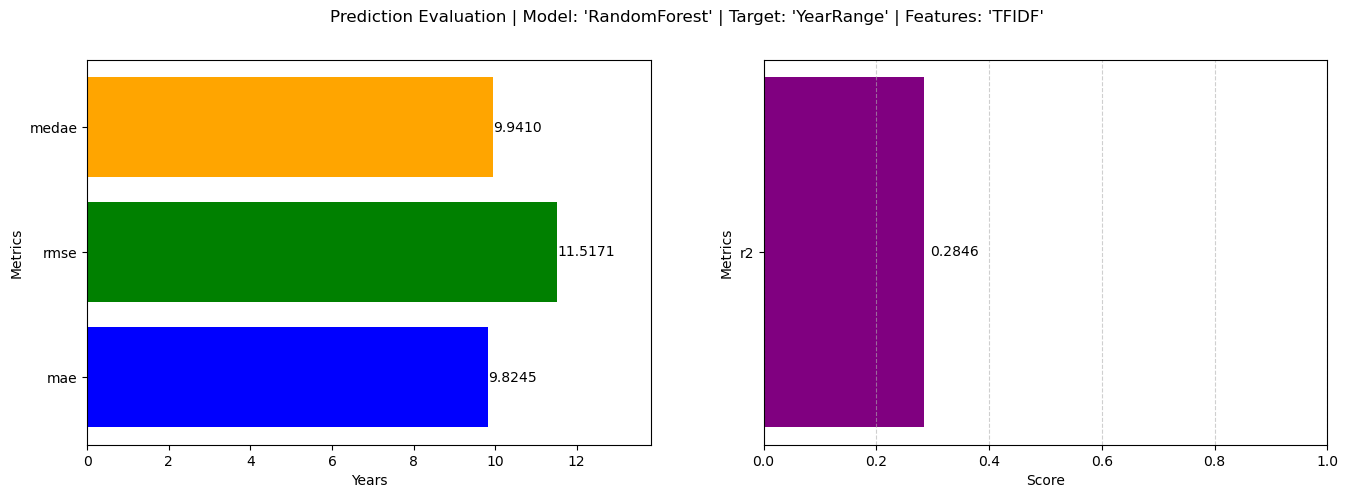



Example Sample Predictions:


,SAMPLE,y_true,y_pred,y_std,CI_lower,CI_upper,confidence_±10,error
152,RANDOM,50.0,22.924746,12.644531,-1.858078,47.707571,0.570972,27.075254
76,BEST,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
70,WORST,50.0,18.468793,9.729761,-0.601189,37.538774,0.695944,31.531207


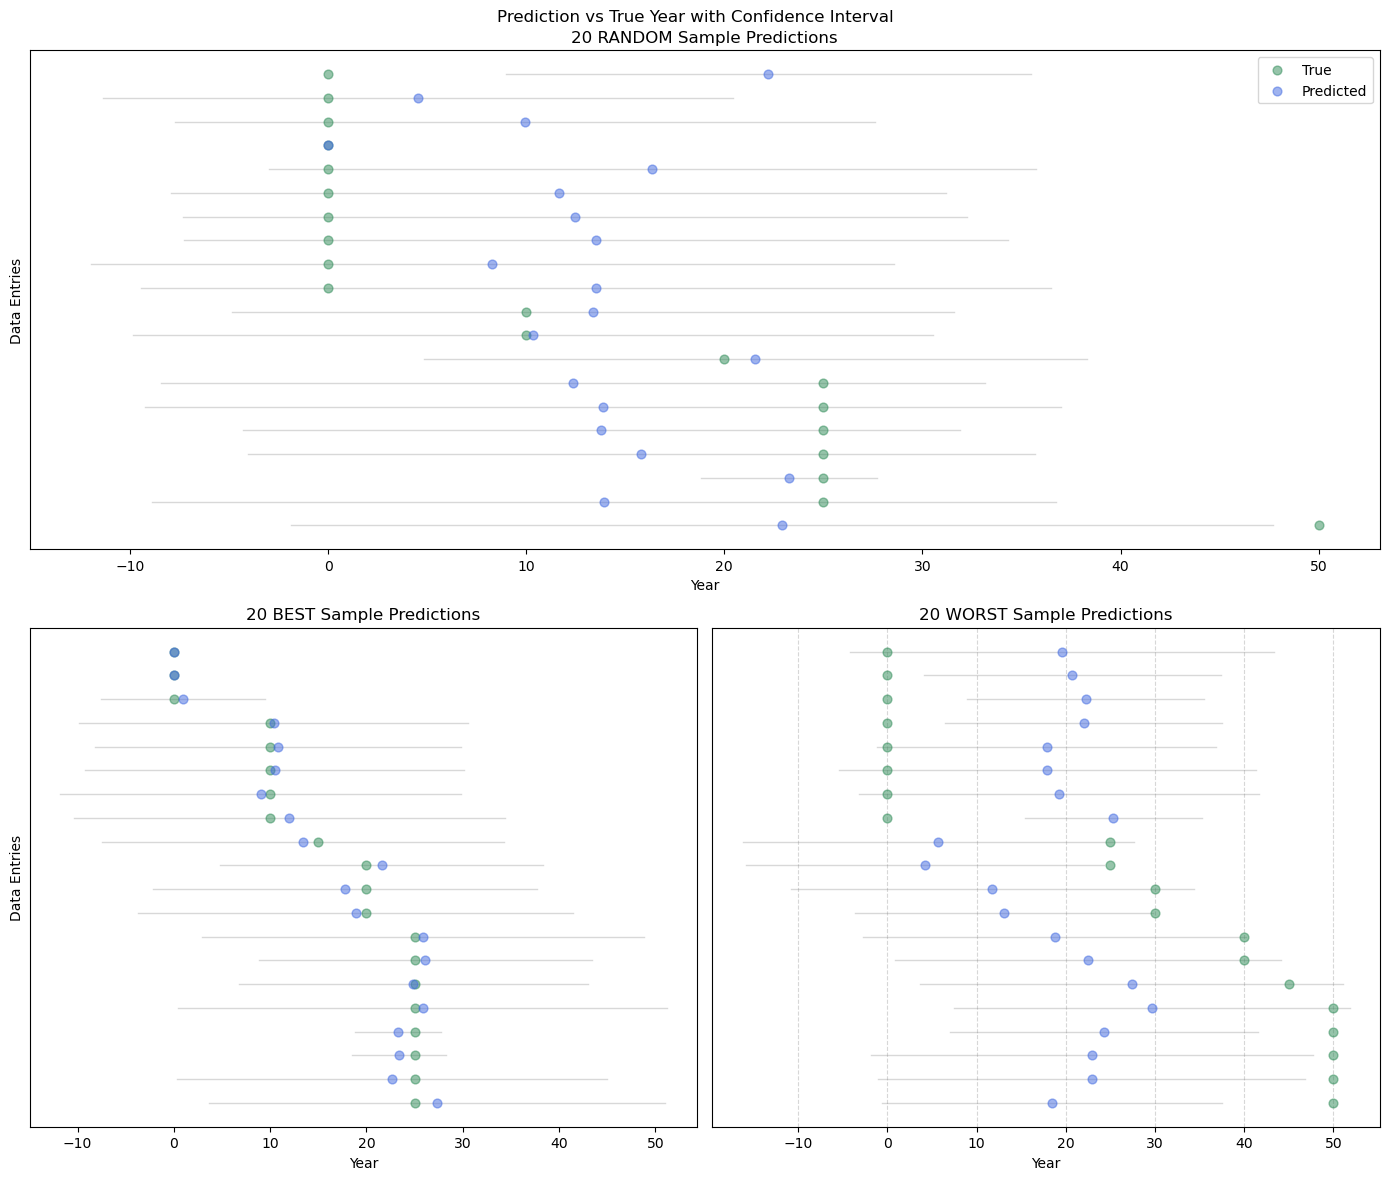

In [12]:
model_class = RandomForestRegressor
model_name = "RandomForest"
features = "tfidf"
target = "YearRange"

# Initialize Model
model = initialize_model(model_class, best_params[model_name][(features, target)])

# Fit
model.fit(X["train"][features].to_numpy(), y["train"][target].to_numpy())

# Predict
results = predict_with_std(model, X["test"][features].to_numpy(), y["test"][target].to_numpy())

# Evaluate
scores = evaluate(results["y_true"], results["y_pred"], metrics_r)
plot_prediction_scores(scores, model_name, target, features)

# Predictions Close Look
result_subsets = get_result_subsets(results, samples=20)
print_top_1(result_subsets)
plot_true_vs_pred(result_subsets)

### Predict *YearRange* with *Image Data*

Best Model and Image Feature Set Pair Based on Cross Validation:
- Regression Model: **Ridge**
- Text Feature Set: **VIT**

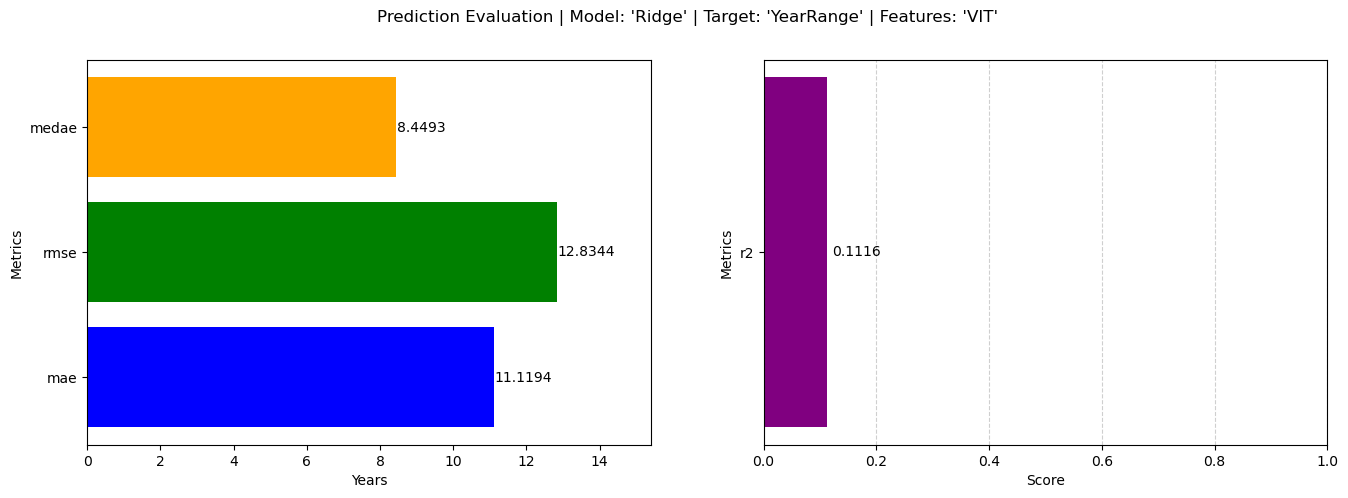



Example Sample Predictions:


,SAMPLE,y_true,y_pred,y_std,CI_lower,CI_upper,confidence_±10,error
152,RANDOM,50.0,21.589019,3.210042,15.297453,27.880586,0.998162,28.410981
181,BEST,25.0,24.703159,3.507127,17.829317,31.577001,0.995646,0.296841
70,WORST,50.0,16.550652,0.437291,15.693577,17.407726,1.000000,33.449348


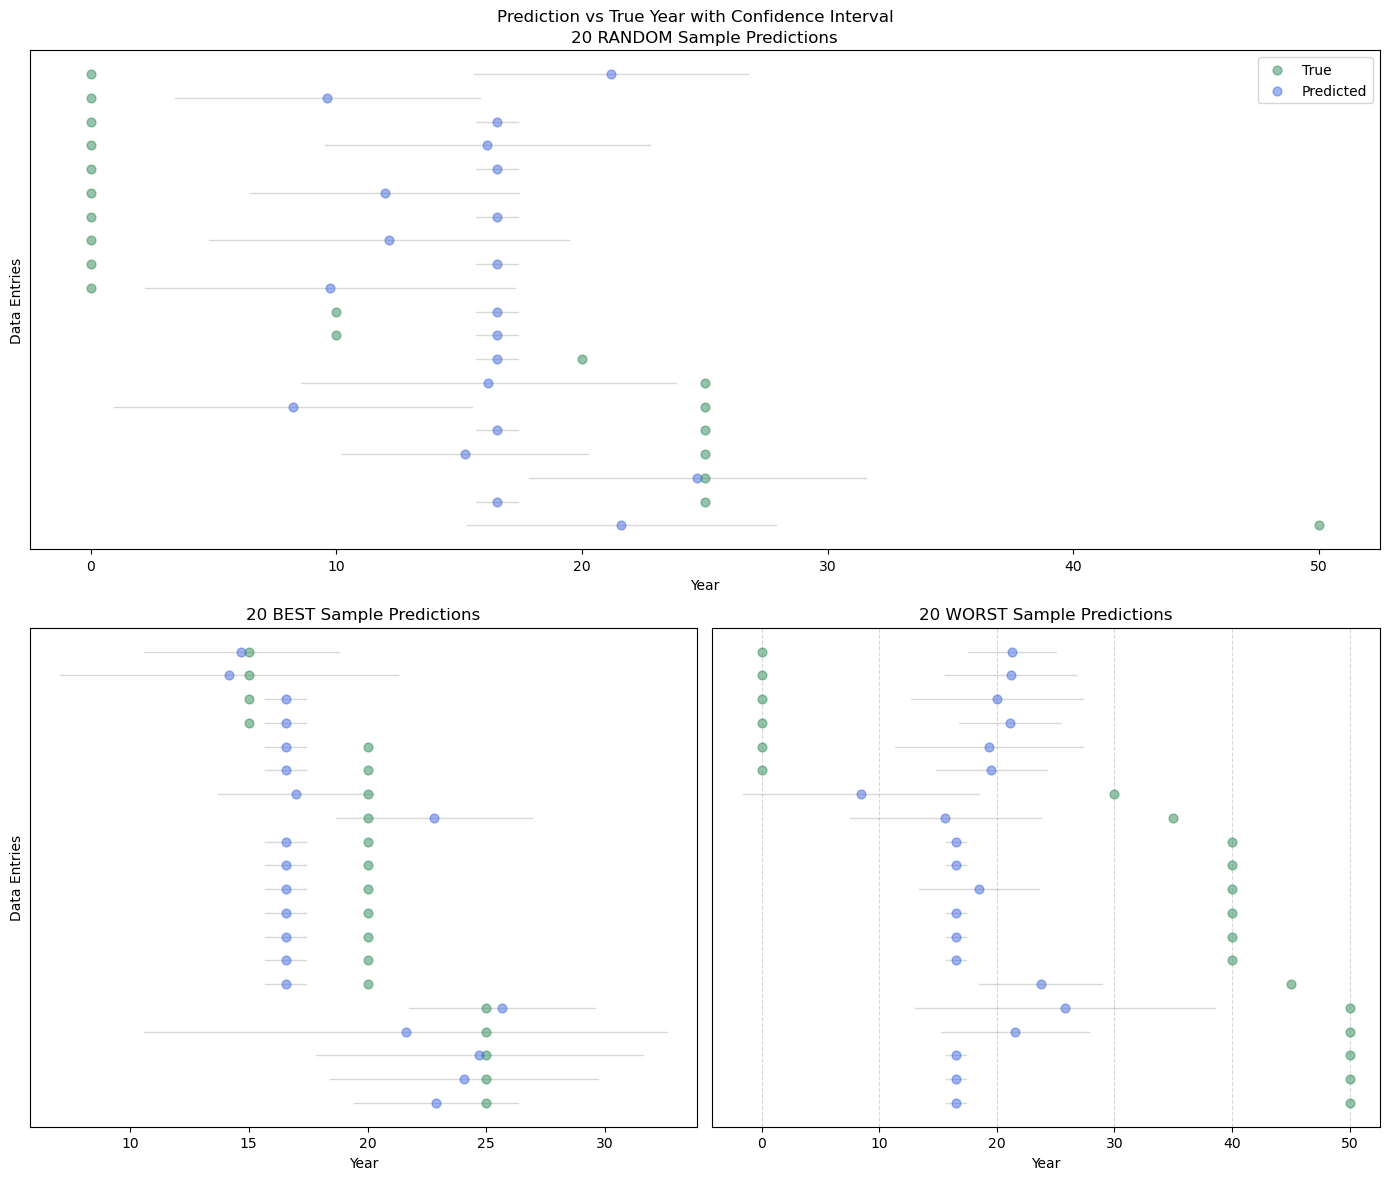

In [13]:
model_class = RandomForestRegressor
model_name = "RandomForest"
features = "vit"
target = "YearRange"

# Initialize Model
model = initialize_model(model_class, best_params[model_name][(features, target)])

# Fit
model.fit(X["train"][features].to_numpy(), y["train"][target].to_numpy())

# Predict
results = predict_with_std(model, X["test"][features].to_numpy(), y["test"][target].to_numpy())

# Evaluate
scores = evaluate(results["y_true"], results["y_pred"], metrics_r)
plot_prediction_scores(scores, model_name, target, features)

# Predictions Close Look
result_subsets = get_result_subsets(results, samples=20)
print_top_1(result_subsets)
plot_true_vs_pred(result_subsets)

### Predict *YearRange* with *Text & Image Combination Data*

Best Model and Combo Feature Set Pair Based on Cross Validation:
- Classification Model: **RandomForest**
- Combo Feature Set: **TF-IDF + RESNET**

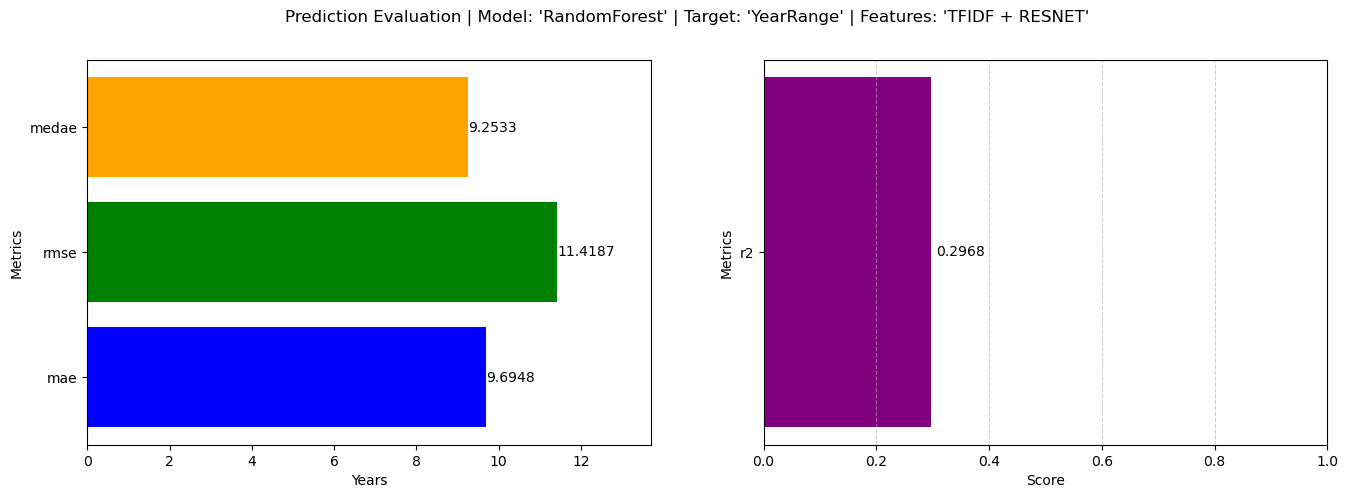



Example Sample Predictions:


,SAMPLE,y_true,y_pred,y_std,CI_lower,CI_upper,confidence_±10,error
152,RANDOM,50.0,22.579405,15.387242,-7.579036,52.737845,0.484236,27.420595
141,BEST,25.0,24.881071,13.341447,-1.267684,51.029827,0.546471,0.118929
70,WORST,50.0,21.707738,9.237783,3.602015,39.813461,0.720974,28.292262


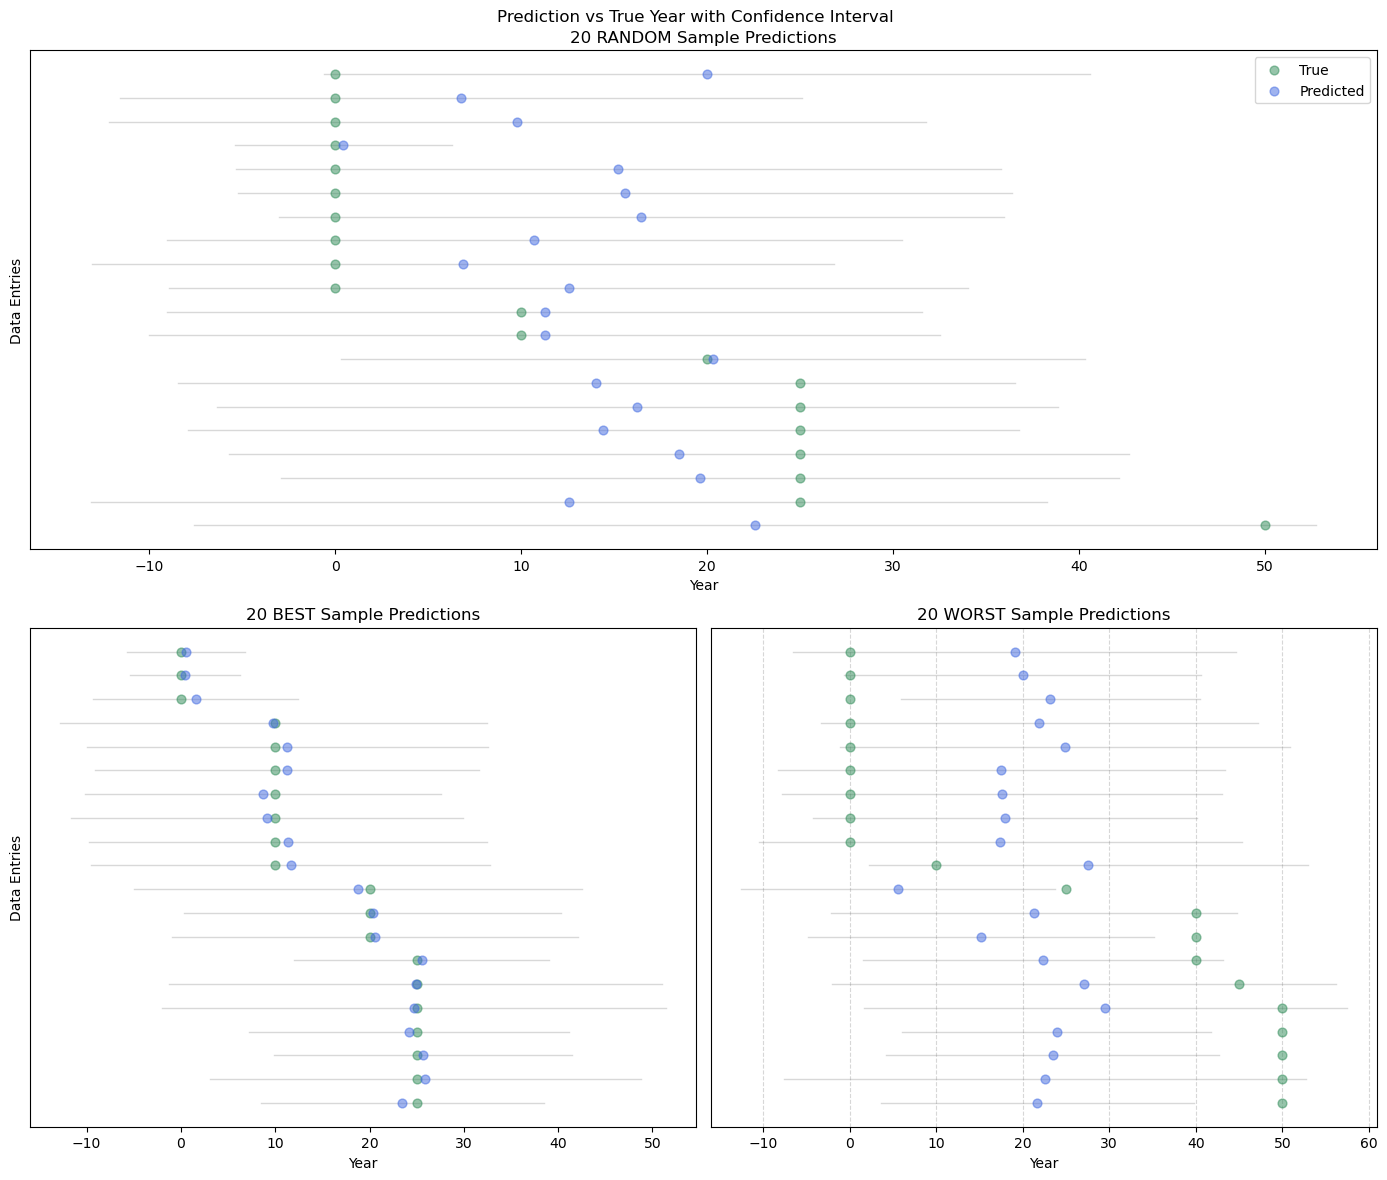

In [14]:
model_class = RandomForestRegressor
model_name = "RandomForest"
features = "tfidf + resnet"
target = "YearRange"

# Initialize Model
model = initialize_model(model_class, best_params[model_name][(features, target)])

# Fit
model.fit(X["train"][features].to_numpy(), y["train"][target].to_numpy())

# Predict
results = predict_with_std(model, X["test"][features].to_numpy(), y["test"][target].to_numpy())

# Evaluate
scores = evaluate(results["y_true"], results["y_pred"], metrics_r)
plot_prediction_scores(scores, model_name, target, features)

# Predictions Close Look
result_subsets = get_result_subsets(results, samples=20)
print_top_1(result_subsets)
plot_true_vs_pred(result_subsets)